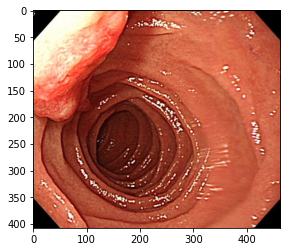

In [1]:
#augmentation
from glob import glob
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

Abnormal_path = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_7/abnormal_val_v4/*.jpg'
abnormal_glob = glob(Abnormal_path)

image = abnormal_glob[10]
image = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
# image_gray = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2GRAY)
img = np.array(image, dtype=np.uint8)
img = (img - np.min(img)) / (np.max(img)-np.min(img))

# edge = cv2.Canny(img,50,200)
# plt.imshow(image_gray,cmap='gray')
plt.imshow(img)

In [2]:
# plt.imshow(img)

In [2]:
# 이미지 배열을 입력받아 5개 출력하는 함수
def show_images(images, labels):
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 8))
    plt.axis('off')
    for i in range(5):
        
        axs[i].imshow(images[i])
        
        axs[i].set_title(labels[i])

# 원본 이미지를 입력받아 4개의 augmentation 적용하여 시각화
def aug_apply(image, label, aug):
    image_list = [image]
    label_list = ['origin']

    for i in range(4):
        aug_image = aug(image=image)['image']
        image_list.append(aug_image)
        label_list.append(label)

    show_images(image_list, label_list)

In [7]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

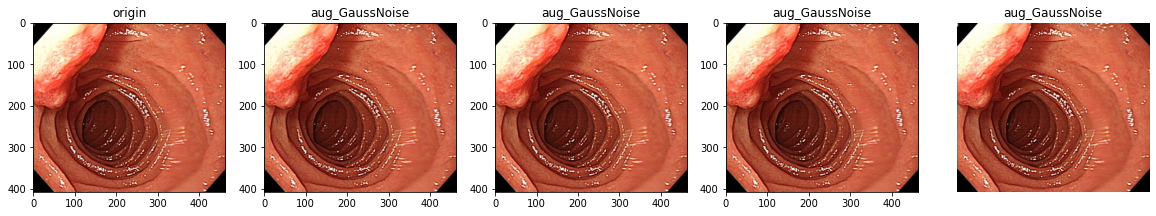

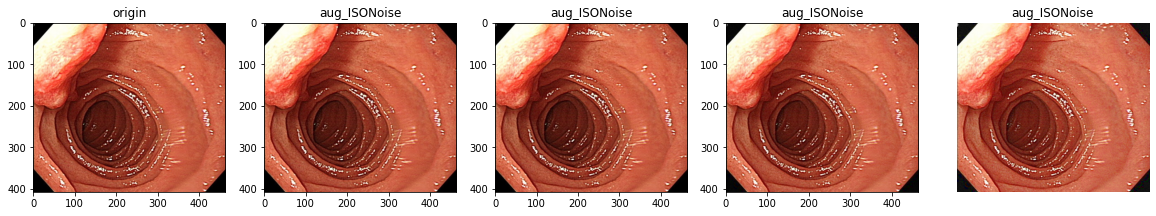

In [15]:
#https://lcyking.tistory.com/80
import albumentations as A
CLAHE = A.CLAHE(p=1,clip_limit=(1, 3))
CLAHE2 = A.CLAHE(p=1,clip_limit=(1, 2),tile_grid_size=(16, 16))
aug_horizontal = A.HorizontalFlip(p=0.3)
aug_bright = A.RandomBrightnessContrast(brightness_limit=(0, 0.3), p=1)
aug_contrast = A.RandomBrightnessContrast(contrast_limit=(0, 0.5), p=1)
normalize= A.Normalize(mean=[0.60433346, 0.27390677, 0.16560815], std=[0.22984403, 0.15982473, 0.12309702], max_pixel_value=255.0)
aug_bright_contrast = A.RandomBrightnessContrast(brightness_limit=(0, 0.5), contrast_limit=(0, 0.4), p=1)
aug_shift_scale_rotate = A.ShiftScaleRotate(shift_limit=0, scale_limit=(0.1, 0.2), rotate_limit=0, p=1, border_mode=cv2.BORDER_REPLICATE)
aug_GaussNoise = A.GaussNoise(var_limit=(0,1), p=1)
aug_ISONoise = A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.5), always_apply=False, p=0.5)
aug_multi = A.Compose([
    A.ShiftScaleRotate(shift_limit=0, scale_limit=(0.1, 0.2), rotate_limit=0, p=1, border_mode=cv2.BORDER_REPLICATE),
    A.CLAHE(clip_limit=(1, 2),p=1),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
], p=1)

# aug_apply(image=image, label='CLAHE', aug=CLAHE)
# aug_apply(image=image, label='CLAHE2', aug=CLAHE2)
# # aug_apply(image=image, label='Horizontal', aug=aug_horizontal)
# # aug_apply(image=image, label='normalize', aug=normalize)
# aug_apply(image=image, label='Only_Contrast', aug=aug_contrast)
# aug_apply(image=image, label='Only_Bright_Contrast', aug=aug_bright_contrast)
aug_apply(image=image, label='aug_GaussNoise', aug=aug_GaussNoise)
aug_apply(image=image, label='aug_ISONoise', aug=aug_ISONoise)
# aug_apply(image=image, label='random_rotate', aug=aug_multi)